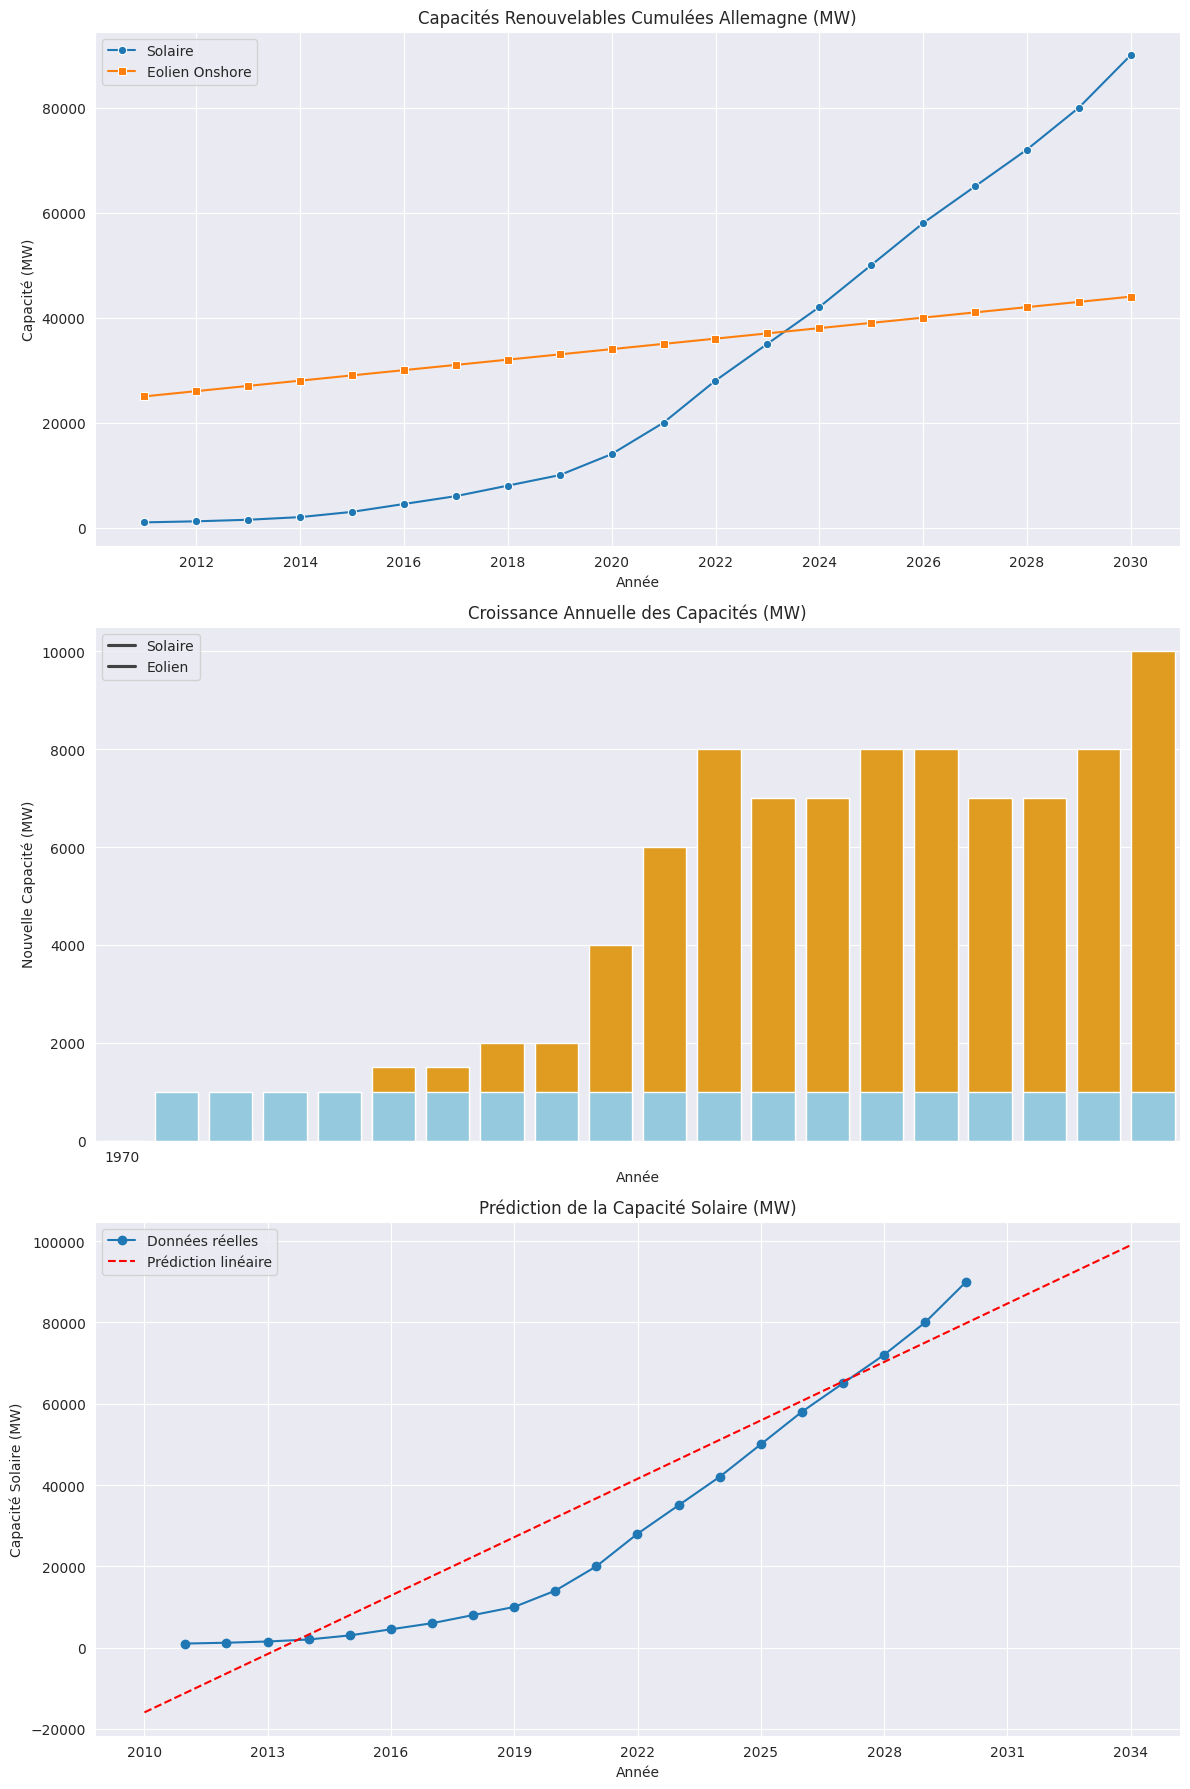

Erreur quadratique moyenne RMSE du modèle : 9100.27 MW
Prédictions solaires 2030-2034 (MW): [79838.42105263 84626.84210526 89415.26315789 94203.68421053
 98992.10526316]


In [5]:
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

# Amélioration du graphique avec plusieurs sous-graphes et styles
sns.set_style('darkgrid')

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Graphique 1: Capacités solaires et éoliennes cumulées
sns.lineplot(data=df, x='date', y='DE_solar_capacity', marker='o', label='Solaire', ax=axs[0])
sns.lineplot(data=df, x='date', y='DE_wind_onshore_capacity', marker='s', label='Eolien Onshore', ax=axs[0])
axs[0].set_title('Capacités Renouvelables Cumulées Allemagne (MW)')
axs[0].set_xlabel('Année')
axs[0].set_ylabel('Capacité (MW)')
axs[0].xaxis.set_major_locator(mdates.YearLocator(2))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].legend()

# Graphique 2: Evolution annuelle des capacités (différences)
df['solar_growth'] = df['DE_solar_capacity'].diff().fillna(0)
df['wind_growth'] = df['DE_wind_onshore_capacity'].diff().fillna(0)
sns.barplot(x='date', y='solar_growth', data=df, color='orange', ax=axs[1], label='Croissance solaire')
sns.barplot(x='date', y='wind_growth', data=df, color='skyblue', ax=axs[1], label='Croissance éolienne')
axs[1].set_title('Croissance Annuelle des Capacités (MW)')
axs[1].set_xlabel('Année')
axs[1].set_ylabel('Nouvelle Capacité (MW)')
axs[1].xaxis.set_major_locator(mdates.YearLocator(2))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].legend(['Solaire', 'Eolien'])

# Graphique 3: Prédiction Capacités Solaires à partir de modèle linéaire
future_years_all = pd.DataFrame({'year': range(2010, 2035)})
future_dates = pd.to_datetime(future_years_all['year'], format='%Y')
future_pred = model.predict(future_years_all[['year']])

axs[2].plot(df['date'], df['DE_solar_capacity'], marker='o', label='Données réelles')
axs[2].plot(future_dates, future_pred, '--', color='red', label='Prédiction linéaire')
axs[2].set_title('Prédiction de la Capacité Solaire (MW)')
axs[2].set_xlabel('Année')
axs[2].set_ylabel('Capacité Solaire (MW)')
axs[2].xaxis.set_major_locator(mdates.YearLocator(3))
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].legend()

plt.tight_layout()
plt.show()

# Évaluation modèle avec RMSE
rmse = np.sqrt(mean_squared_error(y, model.predict(X)))

print(f"Erreur quadratique moyenne RMSE du modèle : {rmse:.2f} MW")

# Affiche prédictions futures actualisées
future_predictions_30_34 = model.predict(pd.DataFrame({'year': range(2030, 2035)}))
print("Prédictions solaires 2030-2034 (MW):", future_predictions_30_34)